This is for testing stuff out.
Rn I want to test out the KeypointDataset.py dataset.
I want to do, like, unit tests on it to see if I get what I think I should.

In [10]:
import pandas as pd
import torch.nn as nn
from KeypointDataset import KeypointDataset
import os
from skimage import io
import cv2
import torch
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import albumentations as A
import numpy as np
import time
import os

"""
ResNet-based Keypoint Estimator
"""
class Configuration:
    def __init__(self):
        """
        self.temp = {
            'train_data': '/home/sasank/Documents/GitRepos/Sasank_JTML_seg/data/3_2_22_fem/train_3_2_22_fem.csv',
            'val_data': '/home/sasank/Documents/GitRepos/Sasank_JTML_seg/data/3_2_22_fem/val_3_2_22_fem.csv',
            'test_data': '/home/sasank/Documents/GitRepos/Sasank_JTML_seg/data/3_2_22_fem/test_3_2_22_fem.csv'
        }
        """
        self.init = {
            'PROJECT_NAME': 'Keypoint Estimation',
            'MODEL_NAME': 'Fem_64KP',
            'RUN_NAME': time.strftime('%Y-%m-%d-%H-%M-%S'),
            'WANDB_RUN_GROUP': 'Local',
            'FAST_DEV_RUN': False,  # Runs inputted batches (True->1) and disables logging and some callbacks
            'MAX_EPOCHS': 1,
            'MAX_STEPS': -1,    # -1 means it will do all steps and be limited by epochs
            'STRATEGY': None    # This is the training strategy. Should be 'ddp' for multi-GPU (like HPG)
        }
        self.etl = {
            'RAW_DATA_FILE': -1,
            'DATA_DIR': "data",
            # Lol what is this?
            'KEYPOINT_DIRECTORY': "keypoints",
            'KEYPOINT_TXT_FILES': ['tib_KPlabels_16.txt'],
            'VAL_SIZE':  0.2,       # looks sus
            'TEST_SIZE': 0.01,      # I'm not sure these two mean what we think
            #'random_state': np.random.randint(1,50)
            # HHG2TG lol; deterministic to aid reproducibility
            'RANDOM_STATE': 42,

            'CUSTOM_TEST_SET': False,
            'TEST_SET_NAME': '/my/test/set.csv'
        }

        self.dataset = {
            'DATA_NAME': 'Ten_Dogs_64KP',
            'SUBSET_PIXELS': True,
            'IMAGE_HEIGHT': 1024,
            'IMAGE_WIDTH': 1024,
            'MODEL_TYPE': 'fem',        # how should we do this? not clear this is still best...
            'CLASS_LABELS': {0: 'bone', 1: 'background'},
            'NUM_KEY_POINTS': 64,
            'IMG_CHANNELS': 1,      # Is this different from self.module['NUM_IMAGE_CHANNELS']
            'STORE_DATA_RAM': False,
            'IMAGE_THRESHOLD': 0,
            'USE_ALBUMENTATIONS': False,

            # What do these do?
            'NUM_PRINT_IMG' : 1,
            'KP_PLOT_RAD' : 3,

            #'NUM_POINTS' : 128,

            'GAUSSIAN_STDDEV' : 5,
            'GAUSSIAN_AMP' : 1e3,

            'STORE_DATA_RAM' : False,

            'CROP_IMAGES' : False,
            'CROP_MIN_X' : 0.29,
            'CROP_MAX_X' : 0.84,
            'CROP_MIN_Y' : 0.45,
            'CROP_MAX_Y' : 0.95,
            
            'IMAGES_PER_GRID': 1,
            'per_grid_image_count_height' : 1, 
            'per_grid_image_count_width' : 1
        }

        """
        # segmentation_net_module needs to be below dataset because it uses dataset['IMG_CHANNELS']
        self.keypoint_net_module = {
            'NUM_KEY_POINTS': 128,
            'NUM_IMG_CHANNELS': self.dataset['IMG_CHANNELS']
        }
        """

        self.datamodule = {
            'IMAGE_DIRECTORY': '/media/sasank/LinuxStorage/Dropbox (UFL)/Canine Kinematics Data/TPLO_Ten_Dogs_grids/',
            'CKPT_FILE': '~/Documents/GitRepos/Stifle-Keypoints/checkpoints/3_8_23_fem_64KP.ckpt',
            'BATCH_SIZE': 2,
            'SHUFFLE': True,        # Only for training; for test and val this is set in the datamodule script to False
            'NUM_WORKERS': 2,
            'PIN_MEMORY': False
            #'SUBSET_PIXELS': True - this is now in dataset
        }


        # hyperparameters for training
        self.hparams = {
            'LOAD_FROM_CHECKPOINT': False,
            'learning_rate': 1e-3
        }

        #self.transform = None
        self.transform = \
        A.Compose([
            # Let's do only rigid transformations for now
            A.HorizontalFlip(p=0.9),
            A.VerticalFlip(p=0.9),
            A.RandomRotate90(p=0.9),
            A.Transpose(p=0.9),
            #A.RandomGamma(always_apply=False, p = 0.5,gamma_limit=(10,300)),
            #A.ShiftScaleRotate(always_apply = False, p = 0.5,shift_limit=(-0.06, 0.06), scale_limit=(-0.1, 0.1), rotate_limit=(-180,180), interpolation=0, border_mode=0, value=(0, 0, 0)),
            #A.Blur(always_apply=False, blur_limit=(3, 10), p=0.2),
            #A.Flip(always_apply=False, p=0.5),
            #A.InvertImg(always_apply=False, p=0.5),
            #A.MultiplicativeNoise(always_apply=False, p=0.25, multiplier=(0.1, 2), per_channel=True, elementwise=True)
            #A.ElasticTransform(always_apply=False, p=0.85, alpha=0.5, sigma=150, alpha_affine=50.0, interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None, approximate=False),
            #A.CoarseDropout(always_apply = False, p = 0.25, min_holes = 1, max_holes = 100, min_height = 25, max_height=25),
        ],
        p=0.85)

In [6]:
# KeypointDataset takes in config and evaluation type.mro


In [7]:
#os.chdir('C:/Users/Sasank/Documents/GitRepos/Stifle-Keypoints/')
os.chdir('/home/sasank/Documents/GitRepos/Stifle-Keypoints/')
config = Configuration()
evaluation_type = 'train'
dataset = KeypointDataset(config, evaluation_type)

In [8]:
batch = next(iter(dataset))

torch.Size([1, 1024, 1024])


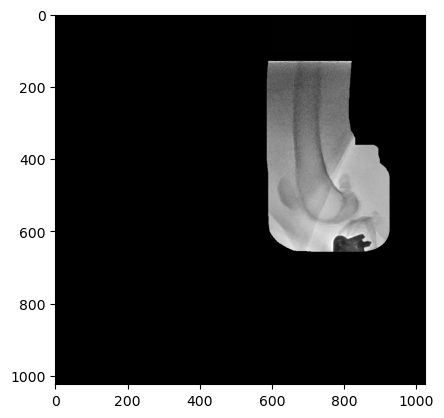

In [13]:
image_tensor = batch['image']
# This is a tensor of shape (batch_size, num_channels, height, width)
# plot the first image in the batch
print(image_tensor.shape)
plt.imshow(image_tensor[0,:,:], cmap='gray')

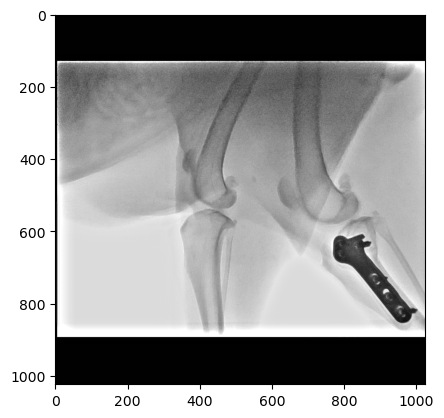

In [14]:
full_image_tensor = batch['full_image']
# This is a tensor of shape (batch_size, num_channels, height, width)
# plot the first image in the batch
#print(full_image_tensor.shape)
plt.imshow(full_image_tensor[0,:,:], cmap='gray')

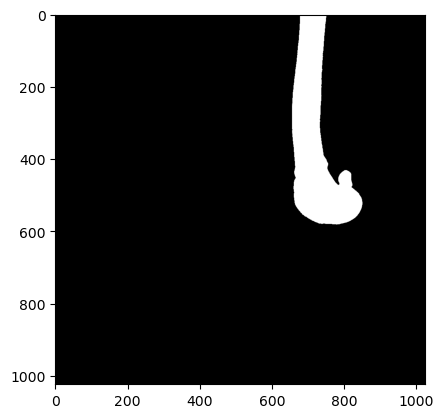

In [15]:
label_tensor = batch['seg_label']
# This is a tensor of shape (batch_size, num_channels, height, width)
# plot the first image in the batch
#print(full_image_tensor.shape)
plt.imshow(label_tensor[0,:,:], cmap='gray')

In [5]:
# TODO: try this out with x and y as output and target keypoints in the way
# that the dataset does it
x = asdf
y = asdf
print(torch.exp(-torch.sum((x - y)**2) / (2 * 1**2)))

NameError: name 'asdf' is not defined

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision

In [ ]:
res = torchvision.models.resnet18(pretrained=True)
modules = list(res.children())[:-2]
print(modules)
res = nn.Sequential(*modules)

param_list = []
for p in res.parameters():
    p.requires_grad = True
    param_list.append(p)


[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

In [ ]:
drop_layers=[];
out_dim_list=[];

# Do a pseudo-forward pass to find downsampling layers
x=torch.randn(1, 3, 512, 512)
for i in range(len(res)):
    y=res[i](x)
    if x.size()[-1]!=y.size()[-1]:
        drop_layers.append(i-1)
        out_dim_list.append(x.size()[1])    
        #print(i-1, x.size()[1])
    x=y
out_dim_list.append(x.size()[1])

In [ ]:
print(drop_layers)
print(out_dim_list)

[-1, 2, 4, 5, 6]
[3, 64, 64, 128, 256, 512]


In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
input_data_frame = pd.read_csv('~/Documents/GitRepos/Stifle-Keypoints/data/KeypointTest/train_KeypointTest.csv',
                                header=None,
                                names=['grid', 'fem_kps'])
input_data_frame = input_data_frame.iloc[1:].reset_index(drop=True)  # MIGHT NEED TO REINDEX BECAUSE INDEX STARTS AT 1
num_points = 128
#print(input_data_frame)
label_point_data = np.vstack(input_data_frame['fem_kps'].apply(lambda x: x.split(',')).apply(lambda x: np.array(x, dtype=float).reshape(-1,2)))  # USED TO WORK BUT DOES NOT NEED TO BE VSTACKED
label_point_data = np.reshape(label_point_data, (input_data_frame.shape[0], num_points, 2))
#print(label_point_data.shape)
print(label_point_data[0][0][0])

0.523439


In [ ]:
amp = 1e3
sigma = 5
gauss_loss = amp/(math.sqrt(2*np.pi)*sigma) *math.exp(-(((0.0855) - (0.6951))**2 + ((-0.0901) - (-0.1389))**2) / (2*sigma**2))
gauss_loss

79.1938751086652